In [379]:
import openmc
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import numpy as np

In [6]:
core = openmc.Material()
pipes = openmc.Material()
hx = openmc.Material()
pump = openmc.Material()
divertor = openmc.Material()
seperator = openmc.Material()

total = {
    core: "",
    pipes: ""
}

# Total

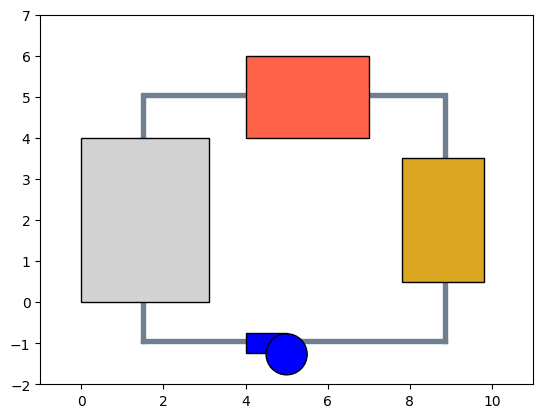

In [464]:
fix, ax = plt.subplots()
plt.gca().set_aspect('equal')
ax.set_xlim(-1, 11)
ax.set_ylim(-2, 7)

# dimensions
d = 3.12
r = d / 2

t = 0.2
th = t / 2

# components
comps = [
    mp.Rectangle((0,0), d, 4, color="lightgray", ec="k"), # core
    mp.Rectangle((4, 4), 3, 2, color="tomato", ec="k"), # hx
    mp.Rectangle((9 - t - 1, 0.5), 2, 3, color="goldenrod", ec="k"), # divertor
    mp.Rectangle((4, -1.25), 1, 0.5, color="blue", ec="k"), # pump
    mp.Circle((5, -1.27), 0.5, color="blue", ec="k")
]

# pipes
pipes = [
    mp.Rectangle((r - th, -1), th, 6, color="slategray"),
    mp.Rectangle((r - th, 5), 9 - r, th, color="slategray"),
    mp.Rectangle((9 - t, -1), th, 6, color="slategray"),
    mp.Rectangle((r - th, -1), 9 - r, th, color="slategray"),
]

# plotting
for i in pipes:
    ax.add_artist(i)

for i in comps:
    ax.add_artist(i)

plt.savefig("total", dpi=600)
plt.show()

# Divertor XS

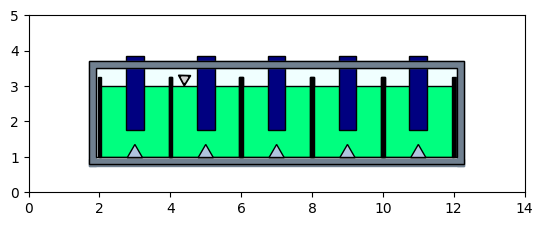

In [465]:
fix, ax = plt.subplots()
plt.gca().set_aspect('equal')
ax.set_xlim(0, 14)
ax.set_ylim(0, 5)

# dims
t = 0.1

# before
comps = [
    mp.Rectangle((1.9, 1), 10.2, 2.5, color="azure"),
    mp.RegularPolygon((4.4, 3.2), 3, radius=0.2, orientation=45, color="k"),
    mp.RegularPolygon((4.4, 3.2), 3, radius=0.1, orientation=45, color="lightgray"),
]

for i in comps:
    ax.add_artist(i)


# blocks
cs = [2, 4, 6, 8, 10]
for c in cs:
    comps = [
        mp.Rectangle((c, 1), 2, 2, color="springgreen", ec="k"),
        mp.Rectangle((c - t/2, 1), t, 2.25, color="black", ec="k"),
        mp.Rectangle((c + 2 - t/2, 1), t, 2.25, color="black", ec="k"),
        mp.RegularPolygon((c + 1, 1.1), 3, radius=0.25, color="lightsteelblue", ec="k"),
        mp.Rectangle((c + 0.75, 1.75), .5, 2.1, color="navy", ec="k")
    ]

    for i in comps:
        ax.add_artist(i)

# after
comps = [
    mp.Rectangle((2 - 0.3, 0.75), 10.6, 0.2, color="slategray"), # bot
    mp.Rectangle((2 - 0.3, 3.5), 10.6, 0.2, color="slategray"), # top
    mp.Rectangle((2 - 0.3, 0.75), 0.2, 2.75, color="slategray"), # left
    mp.Rectangle((12.1, 0.75), 0.2, 2.75, color="slategray"), # right
    
    mp.Rectangle((2 - .1, 1), 10.2, 2.5, fill=False),
    mp.Rectangle((2 - .3, .8), 10.6, 2.9, fill=False),
]

for i in comps:
    ax.add_artist(i)

plt.savefig("xs", dpi=600)
plt.show()

# Divertor Top Down

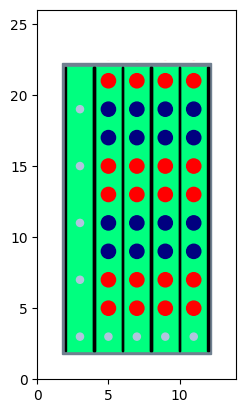

In [467]:
fix, ax = plt.subplots()
plt.gca().set_aspect('equal')
ax.set_xlim(0, 14)
ax.set_ylim(0, 26)

comps = [
    mp.Rectangle((2 - .25, 2 - .25), 10.5, 20.5, color="slategray"),
    mp.Rectangle((2, 2), 10, 20, color="springgreen"),
]

for r in np.arange(6, 22, 4):
    comps.append(mp.Circle((3, r + 1), 0.25, color="lightsteelblue"))

for i in comps:
    ax.add_artist(i)

# repeating
for c in [2, 4, 6, 8, 10]:
    comps = [
        mp.Rectangle((c - t/2, 2), t, 20, color="k"),
        mp.Rectangle((c + 2 - t/2, 2), t, 20, color="k"),
        mp.Circle((c + 1, 3), 0.25, color="lightsteelblue"),
    ]

    if c != 2:
        flip = True
        for r in np.arange(4, 22, 4):
            if flip:
                color = "red"
            if not flip:
                color = "navy"

            flip = not flip
            comps.append(mp.Circle((c + 1, r + 1), 0.5, color=color))
            comps.append(mp.Circle((c + 1, r + 3), 0.5, color=color))
        
    comps.append(mp.Rectangle((2, 22.5), 10, 2, color="white"))
    for i in comps:
        ax.add_artist(i)

plt.savefig("topdown", dpi=600)
plt.show()

# Old Divertor XS

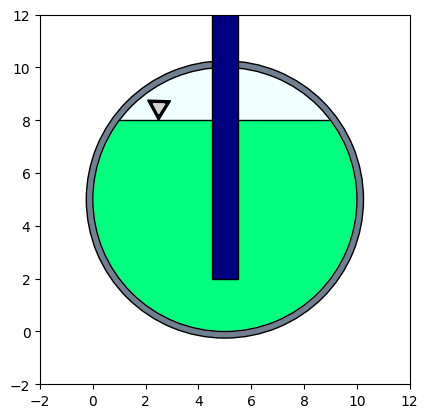

In [173]:
fix, ax = plt.subplots()
plt.gca().set_aspect('equal')
ax.set_xlim(-2, 12)
ax.set_ylim(-2, 12)

comps = [
    mp.Circle((5, 5), 5, color="springgreen"),
    mp.Rectangle((0, 8), 10, 3, color="azure", ec="k"),
    mp.Annulus((5, 5), 10, 5, color="white"),
    mp.Annulus((5, 5), 5.25, .25, color="slategray", ec="k"),
    mp.RegularPolygon((2.5, 8.5), 3, radius=0.5, orientation=45, color="k"),
    mp.RegularPolygon((2.5, 8.5), 3, radius=0.25, orientation=45, color="lightgray"),
    mp.Rectangle((4.5, 2), 1, 11, color="navy", ec="k"),
]

for i in comps:
    ax.add_artist(i)